# 3~8번 학습 모델

In [1]:
from neuralprophet import NeuralProphet
import pandas as pd

def make_df(filename, ID, slicing = 0):
    df = pd.read_csv(filename)
    
    if slicing:
        l = len(df)
        df = df.head(slicing)
        print(f'sliced into {len(df)} out of {l} data.')
        
    df.rename(columns={'Date' : 'ds' , 'S' : 'y'}, inplace = True)
    
    df['ds'] = pd.to_datetime(df['ds'])
    df.set_index('ds', inplace = True)
    df_daily = df.resample('D').mean()
    
    df_daily['H'].fillna(method='ffill', inplace = True)
    df = df_daily.reset_index()
    df['ID'] = ID
    
    df = df[['ds','y','H','ID']]
    
    return df

# 298 기간

df1 = make_df('H-S_seq_1.csv',ID = 'data1')
df2 = make_df('H-S_seq_2.csv',ID = 'data2')
df3 = make_df('H-S_seq_3.csv',ID = 'data3')
df4 = make_df('H-S_seq_4.csv',ID = 'data4')
df5 = make_df('H-S_seq_5.csv',ID = 'data5')
df6 = make_df('H-S_seq_6.csv',ID = 'data6')
df7 = make_df('H-S_seq_7.csv',ID = 'data7')
df8 = make_df('H-S_seq_8.csv',ID = 'data8')
df3_test = make_df('H-S_seq_3.csv',ID = 'data3', slicing = 5)
# df2_test = make_df('H-S_seq_2.csv',ID = 'data2', slicing = 5)

df = pd.concat((df3,df4,df5,df6,df7,df8))

m = NeuralProphet(learning_rate=0.1, 
                  yearly_seasonality=False, 
                  weekly_seasonality=False, 
                  unknown_data_normalization=True, 
                  newer_samples_weight = 4,
                  n_forecasts=10,
                  drop_missing = True,
                  optimizer = 'AdamW'
                  )

m = m.add_future_regressor(name='H', normalize=True)
# metrics = m.fit(df,freq='D')
metrics = m.fit(df)


WARNING - (NP.forecaster.fit) - Changing n_forecasts to 1. Without lags, the forecast can be computed for any future time, independent of lagged values
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe freq automatically defined as D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Dataframe 

sliced into 5 out of 62 data.


WARNING - (NP.forecaster._train) - When Global modeling with local normalization, metrics are displayed in normalized scale.
Epoch[274/274]: 100%|██████████| 274/274 [00:08<00:00, 30.82it/s, SmoothL1Loss=0.000841, MAE=0.0284, RMSE=0.04, Loss=0.000334, RegLoss=0]  


INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data1,1.496670,1.496670,1.496670,0.000000,0.000000
1,2021-08-07,NaN,data1,NaN,1.830347,1.830347,0.000000,0.000000
2,2021-08-08,NaN,data1,NaN,2.164025,2.164025,0.000000,0.000000
3,2021-08-09,NaN,data1,NaN,2.497703,2.497703,0.000000,0.000000
4,2021-08-10,NaN,data1,NaN,2.831381,2.831381,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data1,NaN,57.276188,54.372463,2.903725,2.903725
294,2022-05-27,54.932,data1,2.358890,57.290890,54.387165,2.903725,2.903725
295,2022-05-28,NaN,data1,NaN,57.305595,54.401871,2.903725,2.903725
296,2022-05-29,NaN,data1,NaN,57.320297,54.416576,2.903725,2.903725


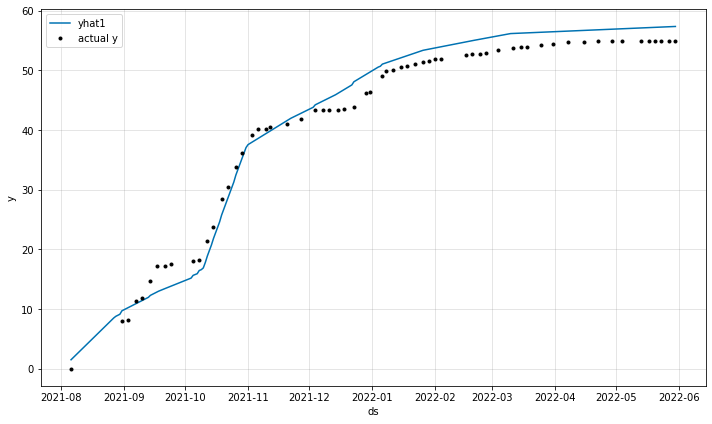

In [2]:
forecast1 = m.predict(df1)
m.plot(forecast1)
forecast1

INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D
INFO - (NP.df_utils._infer_frequency) - Major frequency D corresponds to 99.664% of the data.
INFO - (NP.df_utils._infer_frequency) - Defined frequency is equal to major frequency - D


,ds,y,ID,residual1,yhat1,trend,future_regressors_additive,future_regressor_H
0,2021-08-06,0.000,data2,1.496670,1.496670,1.496670,0.000000,0.000000
1,2021-08-07,NaN,data2,NaN,1.830347,1.830347,0.000000,0.000000
2,2021-08-08,NaN,data2,NaN,2.164025,2.164025,0.000000,0.000000
3,2021-08-09,NaN,data2,NaN,2.497703,2.497703,0.000000,0.000000
4,2021-08-10,NaN,data2,NaN,2.831381,2.831381,0.000000,0.000000
...,...,...,...,...,...,...,...,...
293,2022-05-26,NaN,data2,NaN,57.034210,54.372463,2.661748,2.661748
294,2022-05-27,52.948,data2,4.100916,57.048916,54.387165,2.661748,2.661748
295,2022-05-28,NaN,data2,NaN,57.063618,54.401871,2.661748,2.661748
296,2022-05-29,NaN,data2,NaN,57.078323,54.416576,2.661748,2.661748


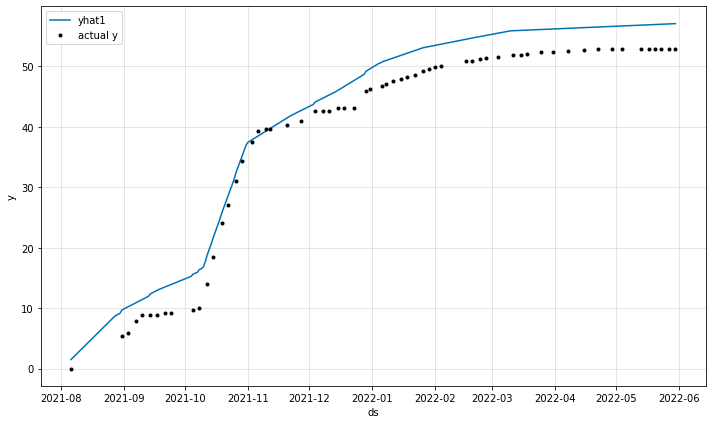

In [3]:
forecast2 = m.predict(df2)
m.plot(forecast2)
forecast2